In [10]:
# Creación aleatoria de datos
import numpy as np

X = np.array([0.5, 23, 0.3, 4.5, 0.3, 0.5,
              -28, -50, 60, -100, -10, -11, 13, 19, 1, 9])

print(X)

[   0.5   23.     0.3    4.5    0.3    0.5  -28.   -50.    60.  -100.
  -10.   -11.    13.    19.     1.     9. ]


In [11]:
# Medidas de tendencia central
from scipy import stats

media = np.mean(X)
mediana = np.median(X)
moda, _ = stats.mode(X)
print('media: ', media)
print('mediana: ', mediana)
print('moda :', moda)

media:  -4.24375
mediana:  0.5
moda : 0.3


In [12]:
# Medidas de posición
import numpy as np
import matplotlib.pyplot as plt

Q1 = np.percentile(X, 25)
Q3 = np.percentile(X, 75)
RIC = Q3 - Q1
lim_inf = Q1 - 1.5*RIC
lim_sup = Q3 + 1.5*RIC

print('RIC :', RIC)
print('limite inferior :', lim_inf)
print('limite superior :', lim_sup)

RIC : 20.25
limite inferior : -40.625
limite superior : 40.375


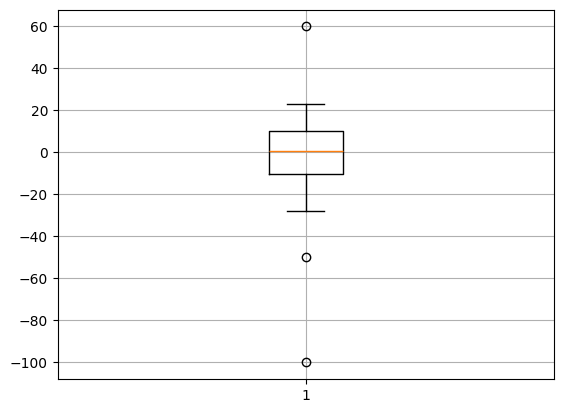

In [13]:
# Dibuja el diagrama de box and whiskers y determina visualmente el número de outliers
plt.boxplot(X)
plt.grid()
plt.show()

In [14]:
# Medidas de dispersión
desvest = np.std(X)
print('Desviación típica: ', desvest)
print('Varianza: ', desvest**2)

Desviación típica:  33.521242681880096
Varianza:  1123.6737109375


In [16]:
# Medidas de distribución
asimetria = stats.skew(X)
curtosis = stats.kurtosis(X, fisher=True) # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html
print('Asimetría ', np.round(asimetria, 4))
print('Curtosis ', np.round(curtosis, 4))

if curtosis>0:
    print('Distribución Leptocúrtica')
elif curtosis<0:
    print('Distribución Platicúrtica')
else:
    print('Distribución Mesocúrtica')

Asimetría  -1.1302
Curtosis  2.2858
Distribución Leptocúrtica


In [27]:
# Cargar el set de datos de Iris
from sklearn import datasets
from pprint import pprint

iris = datasets.load_iris()
# pprint(iris)
X = iris.data
y = iris.target

# ¿Qué tipo de asimetría se observa en la variable "longitud del pétalo"?
petal_length = X[:, 2]
asimetria = stats.skew(petal_length)
print("Asimetría:", asimetria)

# ¿A qué tipo de distribución se ajusta la variable "ancho del sépalo", según su curtosis?
sepal_width = X[:, 1]
curtosis = stats.kurtosis(sepal_width, fisher=True)
print("Curtosis:", curtosis)

Asimetría: -0.2721276664567214
Curtosis: 0.18097631752246768


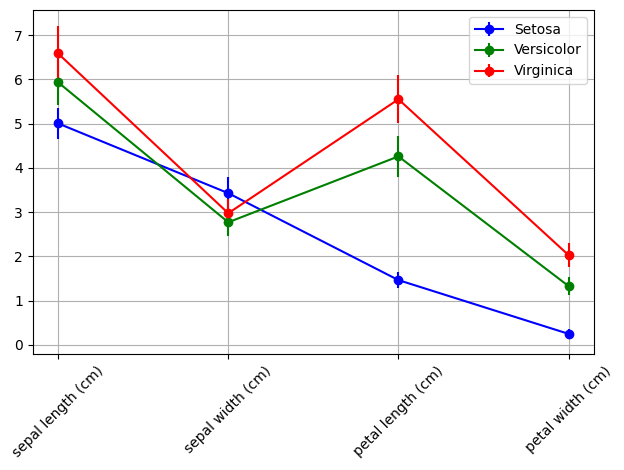

In [48]:
# EJERCICIO EXTRA SOBRE EL DATASET DE IRIS
# Extraer la media y la desviación típica de cada variable en función de la clase y representarlo en un gráfico (plt.errorbar)
X = iris.data
y = iris.target

media_setosa = np.mean(X[y == 0], axis=0)
media_versicolor = np.mean(X[y == 1], axis=0)
media_virginica = np.mean(X[y == 2], axis=0)

desviacion_tipica_setosa = np.std(X[y == 0], axis=0)
desviacion_tipica_versicolor = np.std(X[y == 1], axis=0)
desviacion_tipica_virginica = np.std(X[y == 2], axis=0)

x_plot = iris.feature_names

plt.errorbar(x_plot, media_setosa, yerr=desviacion_tipica_setosa, label='Setosa', fmt='o-', color='blue')
plt.errorbar(x_plot, media_versicolor, yerr=desviacion_tipica_versicolor, label='Versicolor', fmt='o-', color='green')
plt.errorbar(x_plot, media_virginica, yerr=desviacion_tipica_virginica, label='Virginica', fmt='o-', color='red')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

![El resultado debería ser algo como esto:](../images/errorbar.png)